In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file_train = "dados/mitbih_train.csv"
df_train = pd.read_csv(file_train, header=None)
df_train.head()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_train.shape

(87553, 188)

In [ ]:
file_test = "dados/mitbih_test.csv"
df_test = pd.read_csv(file_test, header=None)
df_test.head()

,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_test.shape

(21891, 188)

In [9]:
CLASSES = {
    0: 'Normal (N)',
    1: 'Supraventricular Prematuro (S)',
    2: 'Ventricular Prematuro (V)',
    3: 'Fusão (F)',
    4: 'Desconhecido (Q)'
}

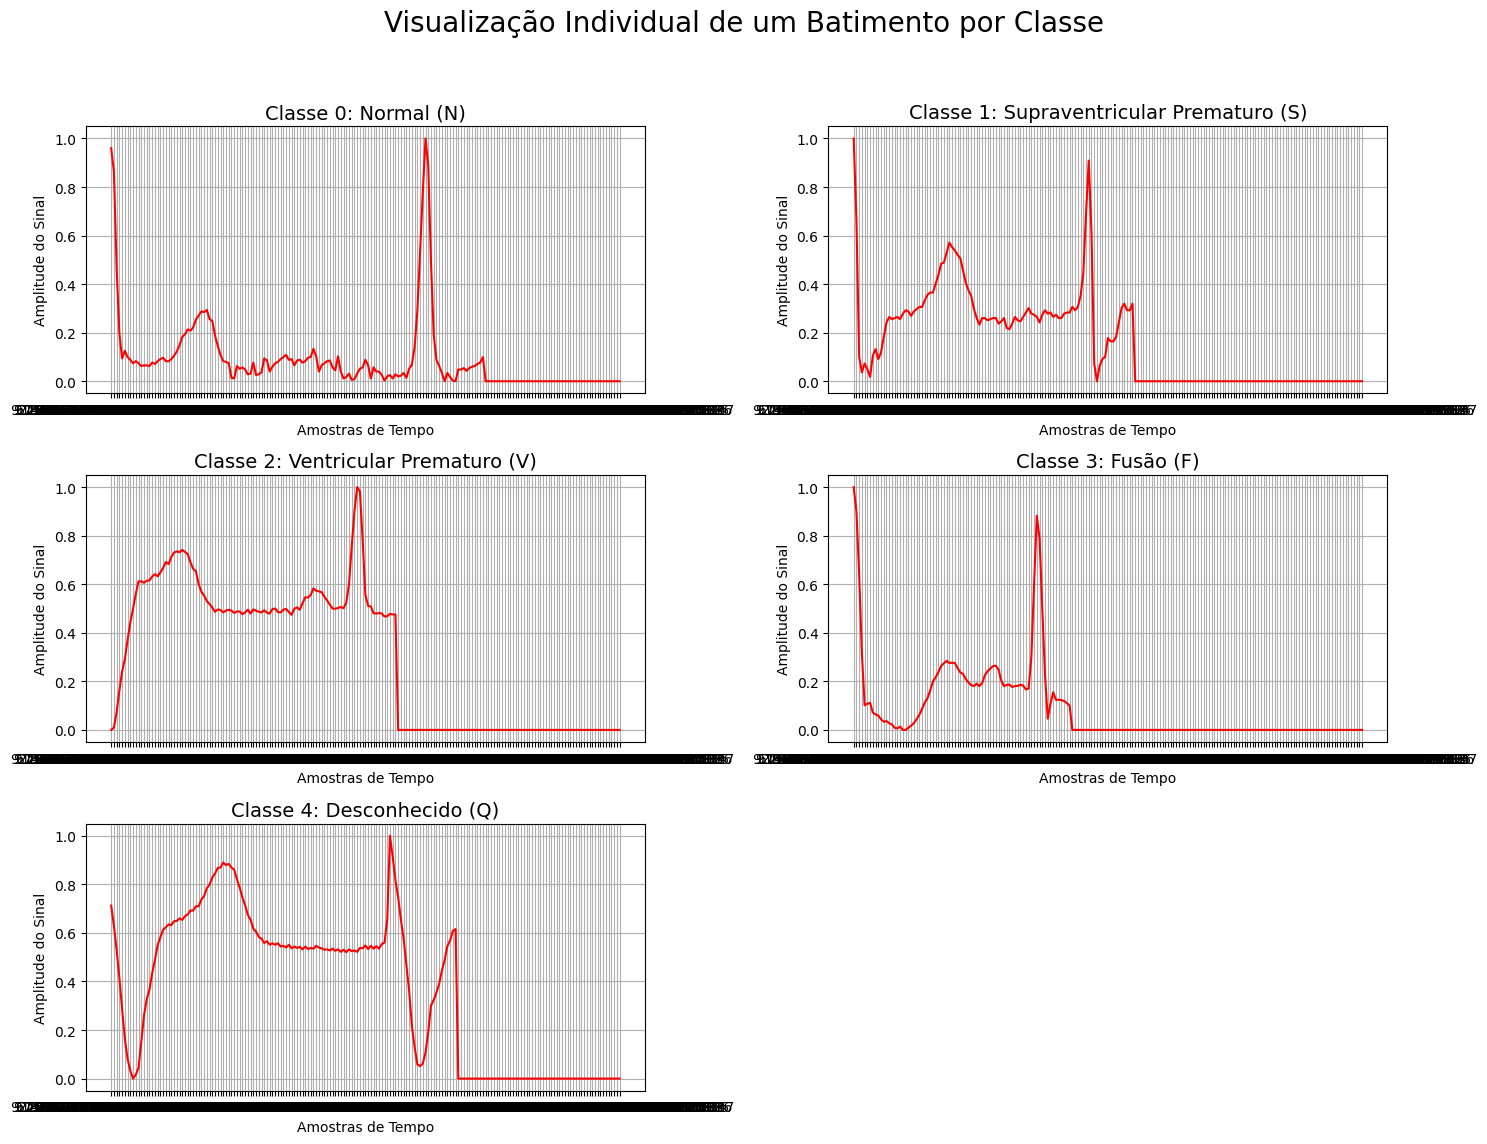

In [13]:
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]
    
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
    
    # O 'axes' é uma matriz 2D. 'flatten()' a transforma em um array 1D para facilitar o loop.
axes = axes.flatten()

for i, (codigo_classe, nome_classe) in enumerate(CLASSES.items()):
        
    ax = axes[i]
        
    primeiro_indice = y_train[y_train == codigo_classe].index[0]
    batimento = X_train.iloc[primeiro_indice]
        
       
    ax.plot(batimento, color='red') 
    ax.set_title(f'Classe {codigo_classe}: {nome_classe}', fontsize=14)
    ax.set_xlabel('Amostras de Tempo')
    ax.set_ylabel('Amplitude do Sinal')
    ax.grid(True)

    
for i in range(len(CLASSES), len(axes)):
    fig.delaxes(axes[i])

fig.suptitle('Visualização Individual de um Batimento por Classe', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 

plt.show()

In [18]:
contagem_classes_treino = y_train.value_counts()

print("Contagem de amostras por classe no treino:")
print(contagem_classes_treino)

Contagem de amostras por classe no treino:
0.000000000000000000e+00.88
0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64


In [17]:
y_test = df_test.iloc[:, -1]

contagem_classes_teste = y_test.value_counts()
print("Contagem de amostras por classe no teste:")
print(contagem_classes_teste)

Contagem de amostras por classe no teste:
0.000000000000000000e+00.65
0.0    18117
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64
